<a href="https://colab.research.google.com/github/RoniBustanai/project_2/blob/main/%D7%A4%D7%A8%D7%95%D7%99%D7%A7%D7%98%D7%95%D7%9F_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **פרויקטון 2**

# **נוריד את מערך הנתונים שלנו**

In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download jessemostipak/hotel-booking-demand

hotel-booking-demand.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:

! unzip <hotel-booking-demand.zip>


/bin/bash: -c: line 0: syntax error near unexpected token `newline'
/bin/bash: -c: line 0: ` unzip <hotel-booking-demand.zip>'


# **נייבא ספריות מתאימות**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


# **נקרא את הנתונים ונעבור עליהם**

In [ ]:
df = pd.read_csv("hotel-booking-demand.zip")


In [ ]:
df.head()

hotel  is_canceled  ...  reservation_status  reservation_status_date
0  Resort Hotel            0  ...           Check-Out               2015-07-01
1  Resort Hotel            0  ...           Check-Out               2015-07-01
2  Resort Hotel            0  ...           Check-Out               2015-07-02
3  Resort Hotel            0  ...           Check-Out               2015-07-02
4  Resort Hotel            0  ...           Check-Out               2015-07-03

[5 rows x 32 columns]

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
df.describe()

is_canceled  ...  total_of_special_requests
count  119390.000000  ...              119390.000000
mean        0.370416  ...                   0.571363
std         0.482918  ...                   0.792798
min         0.000000  ...                   0.000000
25%         0.000000  ...                   0.000000
50%         0.000000  ...                   0.000000
75%         1.000000  ...                   1.000000
max         1.000000  ...                   5.000000

[8 rows x 20 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# **ננקה את הנתונים**

In [ ]:
def missing_percent(df):
    nan_percent= 100*(df.isnull().sum()/len(df))
    nan_percent= nan_percent[nan_percent>0].sort_values()
    return nan_percent

In [ ]:
missing_percent(df)

children     0.003350
country      0.408744
agent       13.686238
company     94.306893
dtype: float64

**<p dir = "rtl"> יש יותר מדי ערכים חסרים ב company, לכן נוריד אותה</p>**

In [ ]:
df = df.drop("company",axis = 1)

**<p dir = "rtl">כעת נתעסק בעמודה agent</p>**

In [ ]:
df["agent"].value_counts()

9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
213.0        1
433.0        1
197.0        1
367.0        1
337.0        1
Name: agent, Length: 333, dtype: int64

In [ ]:
df["agent"] = df["agent"].fillna(method='ffill')


**עכשיו נוציא כל שורה חסרה**

In [ ]:
df = df.dropna()

# **EDA**

**<p dir = "rtl">המטרה העיקרית שלנו היא העמודה "is_canceled", לכן נעבור עליה תחילה</p>**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


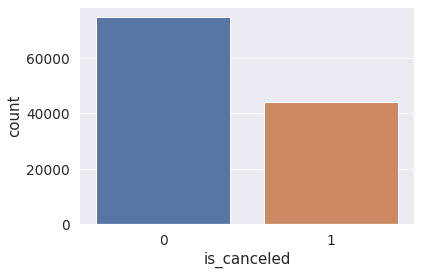

In [ ]:
sns.countplot(df["is_canceled"])

**.ניתן לראות כי שיעור הביטול הוא די גבוה.**
**יש 40,000> מבוטלים אל מול 70,000> לא**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


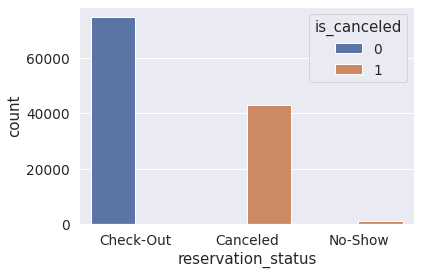

In [ ]:
sns.countplot(df["reservation_status"], hue=df["is_canceled"])

(0.0, 500.0)

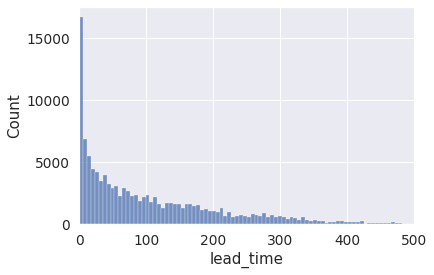

In [ ]:
sns.histplot(df["lead_time"])
plt.xlim(0, 500)

**כעת נשווה את הביטולים בין שני מלונות**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


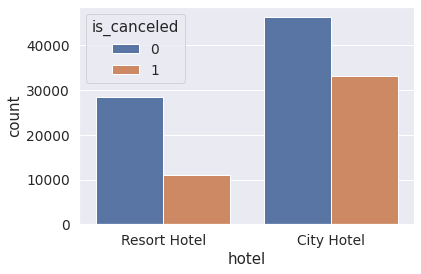

In [ ]:
sns.countplot(df["hotel"], hue=df["is_canceled"])

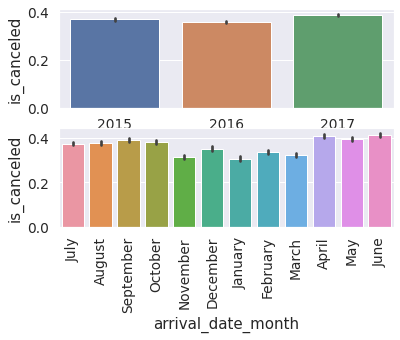

In [ ]:
fig, ax = plt.subplots(2,1)
sns.barplot(x = df["arrival_date_year"], y = df["is_canceled"], ax = ax[0])
sns.barplot(x = df["arrival_date_month"], y = df["is_canceled"], ax = ax[1])
plt.xticks(rotation = 90)
plt.show()

**מכאן ניתן לראות שתאריכי ההגעה לא מהווים פרמטר קריטי, לכן אולי כדי לנו להוריד את עמודות אלו**

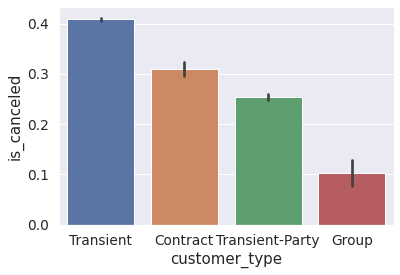

In [ ]:
sns.barplot( x = df["customer_type"], y = df["is_canceled"])

**לסוג הלקוח יש חשיבות רבה ולכן אנחנו מוכרחים לקחת אותו בחשבון במודל שלנו**

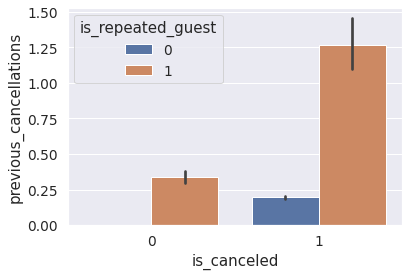

In [ ]:
sns.barplot(x = df["is_canceled"], y = df["previous_cancellations"], hue = df["is_repeated_guest"])

**נסיק שתי מסקנות:**



1.   **לקוחות עם היסטוריה של ביטולים נוטים לבטל לעיתים תכופות יותר**
2.   **לקוחות חוזרים נוטים לבטל יותר**



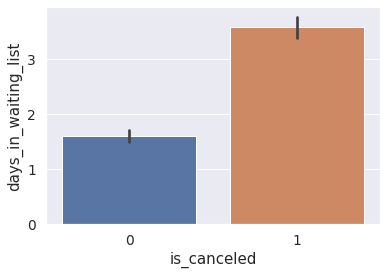

In [ ]:
sns.barplot(x = df["is_canceled"], y = df["days_in_waiting_list"])

**ככל שמחכים יותר ברשימת ההמתנה, כך מבטלים יותר**

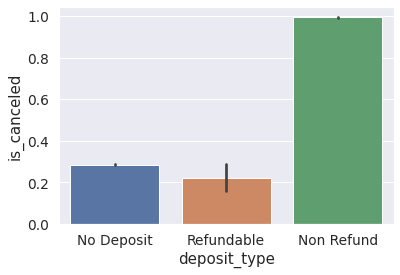

In [ ]:
sns.barplot(y = df["is_canceled"], x = df["deposit_type"])



*   **תשלומים שאין עליהם החזר נוטים להתבטל יותר**
*   **הזמנות בלי חיוב או בעלי החזר הם פחות או יותר אותו הדבר**



In [ ]:
month = pd.to_datetime(df["reservation_status_date"]).dt.month
year = pd.to_datetime(df["reservation_status_date"]).dt.year


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


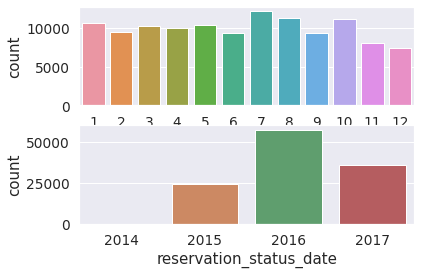

In [ ]:
fig, ax = plt.subplots(2,1)
sns.countplot(month, ax = ax[0])
sns.countplot(year, ax = ax[1])

**תאריך ההזמנה מהווה גורם משמעותי**

   **ככל שמתקרבים לסוף השנה, הביטולים נוטים לרדת אחרי עלייה פתאומית ביולי**




<function matplotlib.pyplot.show>

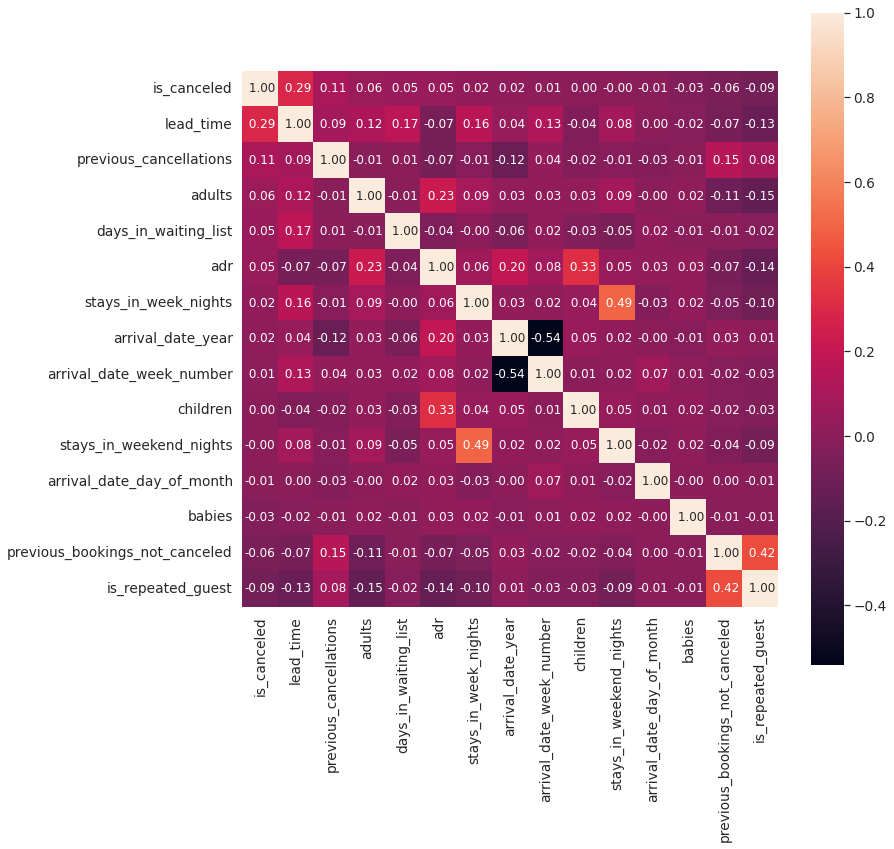

In [ ]:
a = df.corr()
plt.figure(figsize=(12,12))
k = 15
cols = a.nlargest(k, 'is_canceled')['is_canceled'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale = 1.25)
hm = sns.heatmap(cm, annot = True, square = True, fmt = ' .2f', annot_kws={'size' : 12}, yticklabels = cols.values, xticklabels = cols.values)
plt.show

In [ ]:
cor = (df.corr()**2)**0.5
cor_mat = cor["is_canceled"].sort_values(ascending = True)
cor_mat * 100

stays_in_weekend_nights             0.264946
children                            0.474610
arrival_date_day_of_month           0.615946
arrival_date_week_number            0.746500
arrival_date_year                   1.638091
stays_in_week_nights                2.408820
babies                              3.252242
adr                                 4.617138
days_in_waiting_list                5.401352
previous_bookings_not_canceled      5.549528
adults                              5.837584
is_repeated_guest                   8.518345
agent                               9.548283
previous_cancellations             10.992081
booking_changes                    14.462872
required_car_parking_spaces        19.480240
total_of_special_requests          23.566061
lead_time                          29.209315
is_canceled                       100.000000
Name: is_canceled, dtype: float64

# **הנדוס הפרמטרים**

In [ ]:
df.drop(['days_in_waiting_list', 'arrival_date_year', 'arrival_date_year', 'assigned_room_type', 
         'booking_changes', 'reservation_status', 'country', 'days_in_waiting_list'], axis = 1, inplace = True)

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type', 'deposit_type',
       'agent', 'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status_date'],
      dtype='object')

# **בחירת תכונה**

**קודם כל נפצל את הנתונים לקטגורי ומספרי**

In [ ]:
data = df.columns
catg = []
for i in data:
    if df[i].dtype == 'O':
        catg.append(i)
catg = df[catg]
catg

hotel arrival_date_month  ... customer_type reservation_status_date
3       Resort Hotel               July  ...     Transient              2015-07-02
4       Resort Hotel               July  ...     Transient              2015-07-03
5       Resort Hotel               July  ...     Transient              2015-07-03
6       Resort Hotel               July  ...     Transient              2015-07-03
7       Resort Hotel               July  ...     Transient              2015-07-03
...              ...                ...  ...           ...                     ...
119385    City Hotel             August  ...     Transient              2017-09-06
119386    City Hotel             August  ...     Transient              2017-09-07
119387    City Hotel             August  ...     Transient              2017-09-07
119388    City Hotel             August  ...     Transient              2017-09-07
119389    City Hotel             August  ...     Transient              2017-09-07

[118895 rows x 9 columns]

In [ ]:
num = df.drop(catg, axis = 1)
num = num.drop("is_canceled", axis = 1)
num

lead_time  ...  total_of_special_requests
3              13  ...                          0
4              14  ...                          1
5              14  ...                          1
6               0  ...                          0
7               9  ...                          1
...           ...  ...                        ...
119385         23  ...                          0
119386        102  ...                          2
119387         34  ...                          4
119388        109  ...                          0
119389        205  ...                          2

[118895 rows x 15 columns]

In [ ]:
num['lead_time'] = np.log(num['lead_time'] + 1)
num['arrival_date_week_number'] = np.log(num['arrival_date_week_number'] + 1)
num['arrival_date_day_of_month'] = np.log(num['arrival_date_day_of_month'] + 1)
num['adr'] = np.log(num['adr'] + 1)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
catg["reservation_status_date"] = pd.to_datetime(catg["reservation_status_date"])

catg["year"] = catg["reservation_status_date"].dt.year
catg["month"] = catg["reservation_status_date"].dt.month
catg["day"] = catg["reservation_status_date"].dt.day

catg = catg.drop("reservation_status_date", axis = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [ ]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

columns = catg.columns
for col in columns:
    catg[col] = label.fit_transform(catg[col])
catg

hotel  arrival_date_month  meal  ...  year  month  day
3           1                   5     0  ...     1      6    1
4           1                   5     0  ...     1      6    2
5           1                   5     0  ...     1      6    2
6           1                   5     0  ...     1      6    2
7           1                   5     1  ...     1      6    2
...       ...                 ...   ...  ...   ...    ...  ...
119385      0                   1     0  ...     3      8    5
119386      0                   1     0  ...     3      8    6
119387      0                   1     0  ...     3      8    6
119388      0                   1     0  ...     3      8    6
119389      0                   1     2  ...     3      8    6

[118895 rows x 11 columns]

In [ ]:
X = catg.join(num).drop("adr",axis = 1)
y = df["is_canceled"]

**נפצל את התכונות**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

# **יצירת המודל**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97     24607
           1       0.94      0.94      0.94     14629

    accuracy                           0.96     39236
   macro avg       0.95      0.95      0.95     39236
weighted avg       0.96      0.96      0.96     39236



**96% דיוק**